In [2]:
import copy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1244 non-null   int64  
 1   sex       1244 non-null   object 
 2   bmi       1244 non-null   float64
 3   children  1244 non-null   int64  
 4   smoker    1244 non-null   object 
 5   region    1244 non-null   object 
 6   charges   1244 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 68.2+ KB


In [6]:
df.describe(include="all").T  # mean: 平均值，std:标差值 unique: 多少种不同值  百分位值：第p百分位数是这样一个值，它使得至少有p%的数据项小于或等于这个值，且至少有(100-p)%的数据项大于或等于这个值。以身高为例，身高分布的第五百分位表示有5%的人的身高小于此测量值，95%的身高大于此测量值。freq:出现次数最高的那个值（top）的出现频率。

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1244.0,NaN,NaN,NaN,39.088424,14.055295,18.0,26.0,39.0,51.0,64.0
sex,1244,2,male,625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1244.0,NaN,NaN,NaN,30.582858,6.159513,15.96,26.06,30.21,34.61875,53.13
children,1244.0,NaN,NaN,NaN,1.103698,1.215885,0.0,0.0,1.0,2.0,5.0
smoker,1244,2,no,990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1244,4,southeast,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1244.0,NaN,NaN,NaN,13198.216342,12001.805804,1121.8739,4733.635288,9382.033,16579.959053,63770.42801


In [7]:
# Глядя на столбец возраста, данные выглядят репрезентативными для истинного возрастного распределения взрослого населения. Очень немногие люди имеют более двух детей. 75% людей имеют 2 или менее детей.
# Обвинение сильно искажено, поскольку большинству людей требуется базовая медицинская помощь, и лишь немногие страдают от болезней, от которых нужно избавиться дороже.

In [8]:
df.isnull().sum()  # 判断是否存在缺失值

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

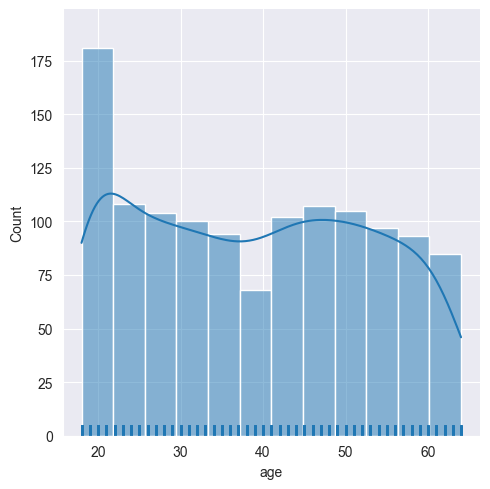

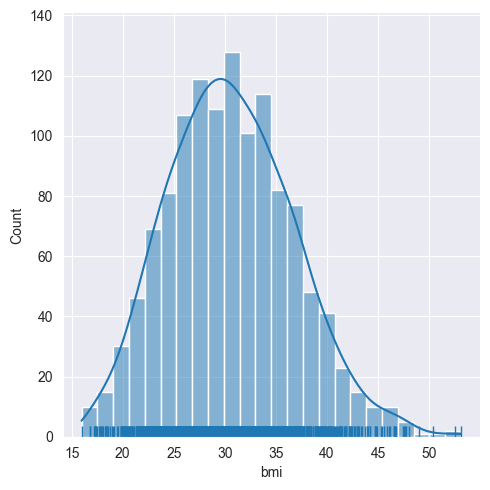

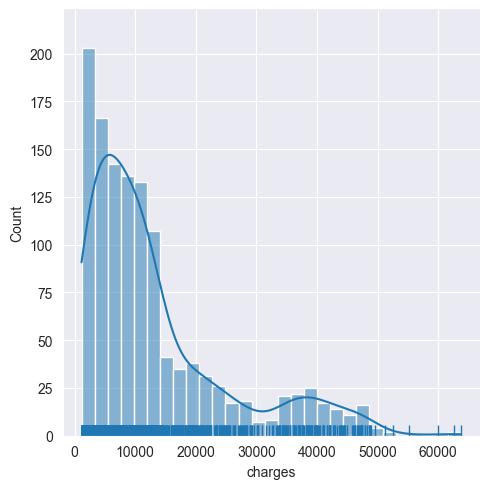

In [9]:
# Plots to see the distribution of the continuous features individually
sns.displot(df['age'], kde=True, rug=True)
sns.displot(df['bmi'], kde=True, rug=True)
sns.displot(df['charges'], kde=True, rug=True)

In [10]:
# Insight: Видим, что "BMI" приблизительно нормально распределен, "Age" кажется распределенным равномерно и "Charges" сильно перекошены.

['southwest' 'southeast' 'northwest' 'northeast']
[309, 336, 302, 297]


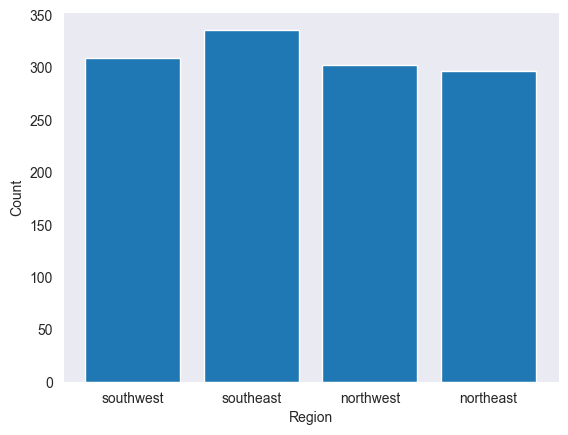

In [11]:
fig, ax = plt.subplots()
regions = df['region'].unique()
counts = []
for region in regions:
    counts.append(df['region'].loc[df['region'] == region].count())
print(regions)
print(counts)
ax.bar(regions, counts)
plt.xlabel('Region')
plt.ylabel('Count')
plt.grid()
plt.show()

In [12]:
# Insights: Региональное распределение клиентов не сильно отличается.

Text(0.5, 0.98, 'Numbers of children in family')

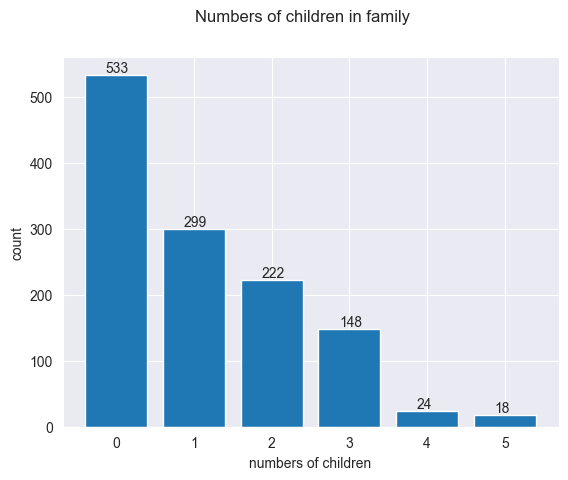

In [13]:
values = []
levels = df['children'].unique()
for level in df['children'].unique():
    values.append(df['children'].loc[df['children'] == level].count())
barplot = plt.bar(levels, values)
for bar in barplot:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3.0, y_val, int(y_val), va='bottom')
plt.xlabel("numbers of children")
plt.ylabel("count")
plt.suptitle("Numbers of children in family")

In [14]:
# Insights: Больше клиентов не имеют детей, в то время как очень меньше имеют 5 детей.

In [15]:
df.sex = pd.Categorical(df.sex)
df = df.assign(sex_code = df.sex.cat.codes)
df.region = pd.Categorical(df.region)
df = df.assign(region_code = df.region.cat.codes)
df.smoker = pd.Categorical(df.smoker)
df = df.assign(smoker_code = df.smoker.cat.codes)
df

,age,sex,bmi,children,smoker,region,charges,sex_code,region_code,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,0,3,1
1,18,male,33.770,1,no,southeast,1725.55230,1,2,0
2,28,male,33.000,3,no,southeast,4449.46200,1,2,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1239,50,male,30.970,3,no,northwest,10600.54830,1,1,0
1240,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1241,18,female,36.850,0,no,southeast,1629.83350,0,2,0
1242,21,female,25.800,0,no,southwest,2007.94500,0,3,0


In [16]:
sex = df['sex'].value_counts()[:2]
sex

male      625
female    619
Name: sex, dtype: int64

TypeError: Legend.__init__() got an unexpected keyword argument 'lables'

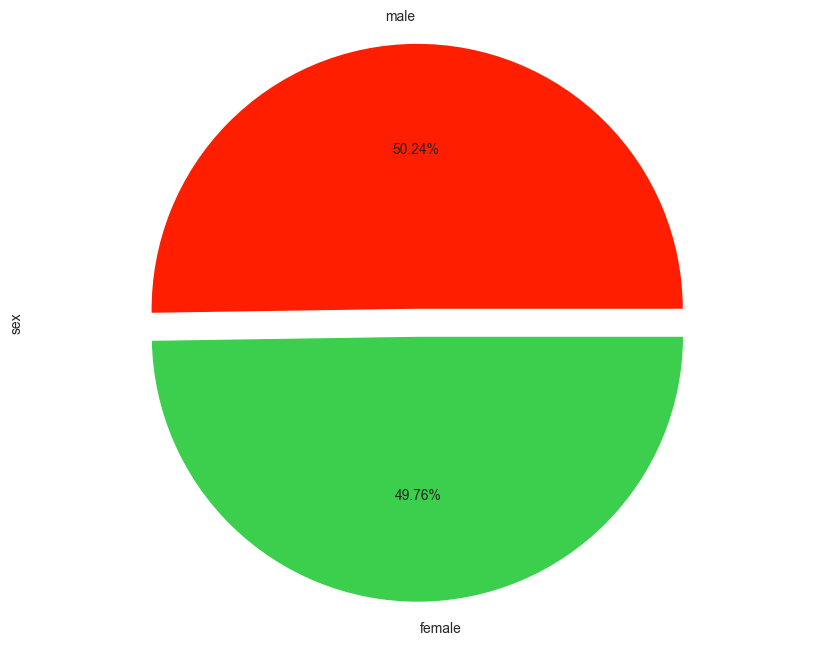

In [17]:
plt.figure(figsize=(10,8), )
explode = (0.1, 0)
colors = ['#FF1E00', '#3CCF4E']

sex.plot(kind='pie',
         colors=colors,
         explode=explode,
         autopct='%1.2f%%')
plt.axis('equal')
plt.legend(lables=sex.index, loc="best")

In [ ]:
# Insights: Гендерное соотношение страховых подрядчиков существенно не отличается

In [ ]:
sns.boxplot(x='sex', y='charges', data=df)

In [ ]:
# Insights: Как у мужчин, так и у женщин мы видим, что многие из них заплатили экстремальные сборы. У женщин больше выбросов, в то время как у мужчин перекос вправо говорит о том, что больше из них платят более высокие сборы.

In [ ]:
smoker = df['smoker'].value_counts()[:2]
smoker

In [ ]:
plt.figure(figsize=(10,8), )
explode = (0.1, 0)
colors = ['#A66CFF', '#EAE509']

smoker.plot(kind='pie',
         colors=colors,
         explode=explode,
         autopct='%1.2f%%')
plt.axis('equal')
plt.legend(lables=smoker.index, loc="best")

In [ ]:
# insights: Количество некурящих в выборке значительно выше, чем курящих.

<AxesSubplot:xlabel='smoker', ylabel='count'>

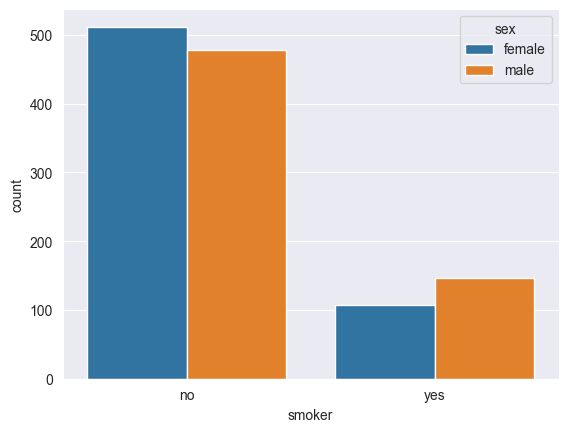

In [18]:
sns.countplot(x=df['smoker'], hue=df['sex'])

In [19]:
# insights: Это говорит о том, что привычка курить не зависит от пола.

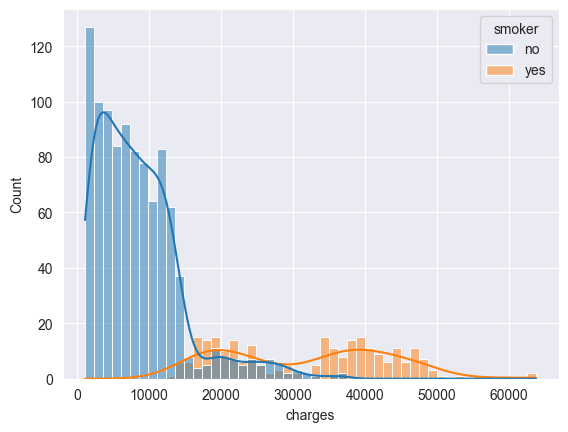

TypeError: Legend.__init__() got an unexpected keyword argument 'lables'

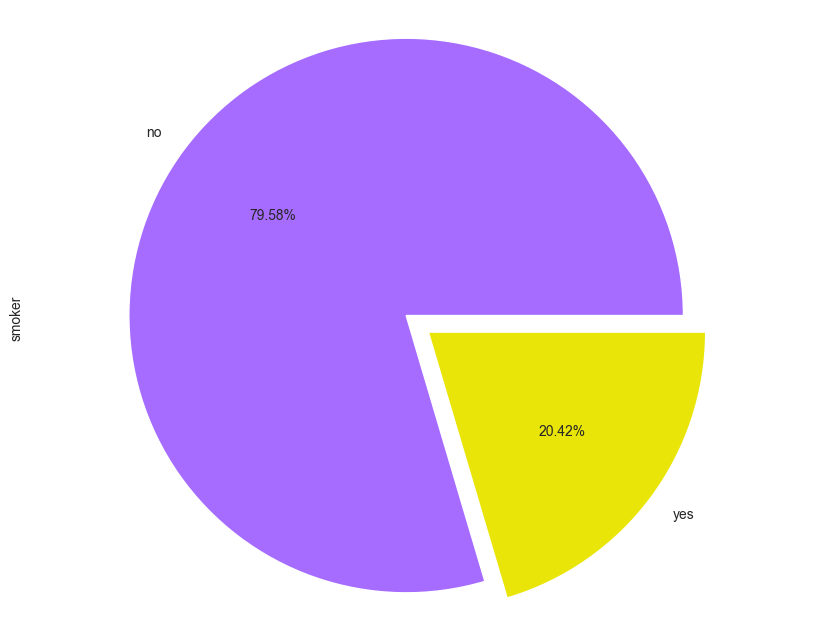

In [20]:
sns.histplot(x='charges', data=df, kde=True, hue='smoker', bins=50)
plt.show()

smoker = df['smoker'].value_counts()
plt.figure(figsize=(10,8), )
explode = (0.1, 0)
colors = ['#A66CFF', '#EAE509']

smoker.plot(kind='pie',
         colors=colors,
         explode=explode,
         autopct='%1.2f%%')
plt.axis('equal')
plt.legend(lables=smoker.index, loc="best")
plt.show()

In [21]:
# Insights: Видим, что у некурящих гораздо меньше личных медицинских расходов, чем у курильщиков. Это также показывает со стороны, что курение вредно для здоровья человека.

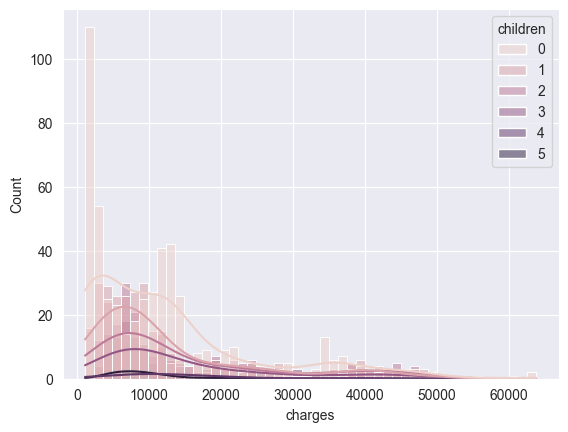

Text(0.5, 0.98, 'Numbers of children in family')

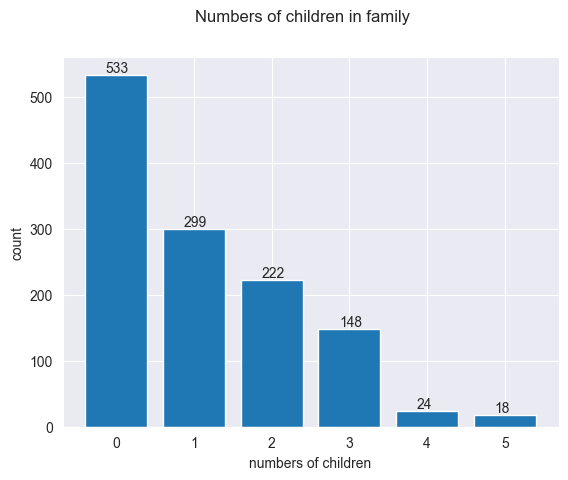

In [22]:
sns.histplot(x='charges', data=df, kde=True, hue='children', bins=50)
plt.show()

values = []
levels = df['children'].unique()
for level in df['children'].unique():
    values.append(df['children'].loc[df['children'] == level].count())
barplot = plt.bar(levels, values)
for bar in barplot:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3.0, y_val, int(y_val), va='bottom')
plt.xlabel("numbers of children")
plt.ylabel("count")
plt.suptitle("Numbers of children in family")

# sns.boxplot(x='children', y='charges', data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

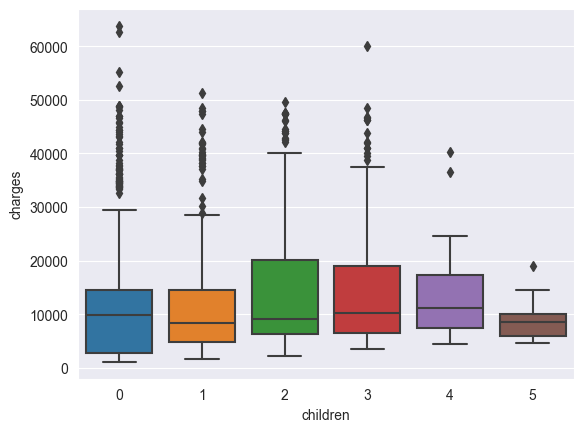

In [23]:
sns.boxplot(x='children', y='charges', data=df)

In [24]:
# insights: Видим, что в некоторых случаях мы видим, что чрезвычайно высокие сборы платят люди, не имеющие детей, в то время как меньше всего платят те, у кого пятеро детей.

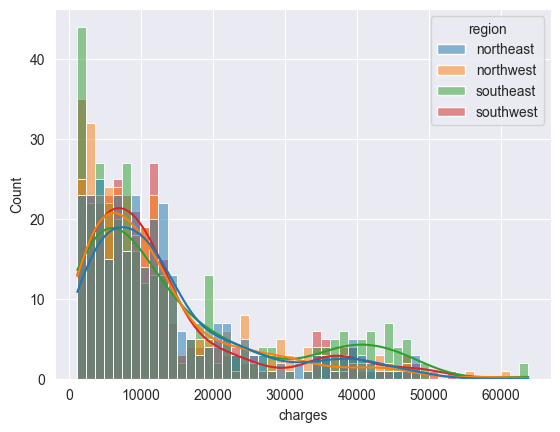

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']
[309, 336, 302, 297]


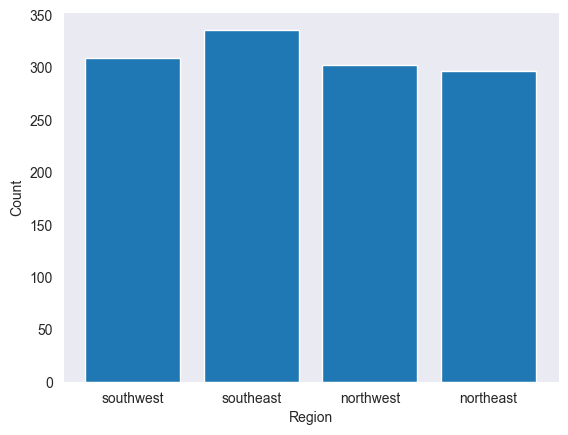

In [25]:
sns.histplot(x='charges', data=df, kde=True, hue='region', bins=50)
plt.show()

fig, ax = plt.subplots()
regions = df['region'].unique()
counts = []
for region in regions:
    counts.append(df['region'].loc[df['region'] == region].count())
print(regions)
print(counts)
ax.bar(regions, counts)
plt.xlabel('Region')
plt.ylabel('Count')
plt.grid()
plt.show()

In [26]:
# Insight: Видим, что Юго-восточные клиенты платят больше.

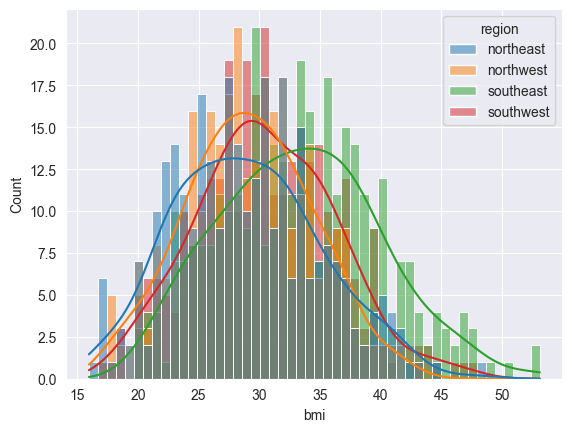

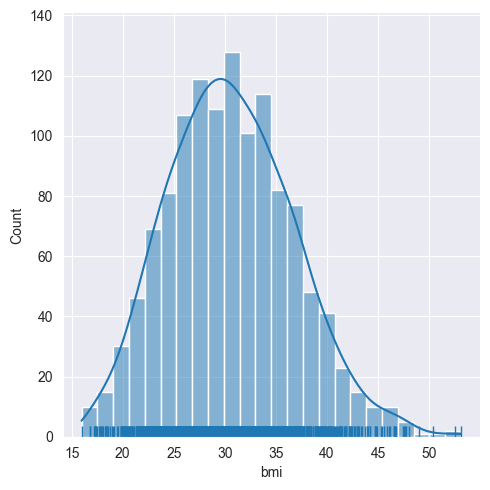

In [27]:
sns.histplot(x='bmi', data=df, kde=True, hue='region', bins=50)
plt.show()

sns.displot(df['bmi'], kde=True, rug=True)

In [28]:
# Insight: Видим, что больше клиентов с идеальным соотношением веса и роста в северо-восточном регионе. В то же время на Юго-Востоке было найдено больше клиентов с более высоким соотношением веса и роста, чем в остальных трех регионах. Это говорит о том, что больше клиентов в регионе имеют проблемы с ожирением.

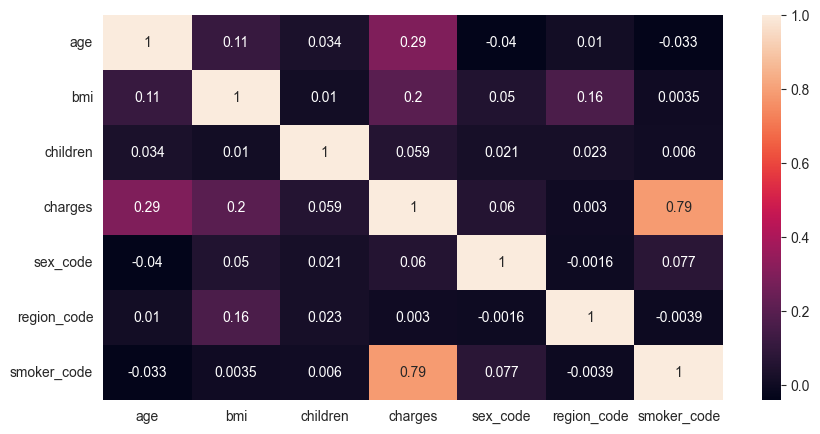

In [29]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# Insights: Можно наблюдать высокую корреляцию между сбором и тем, курит ли клиент. Можно наблюдать определенную положительную корреляцию между: сбором и age, charges и bmi, а также местоположением и bmi.

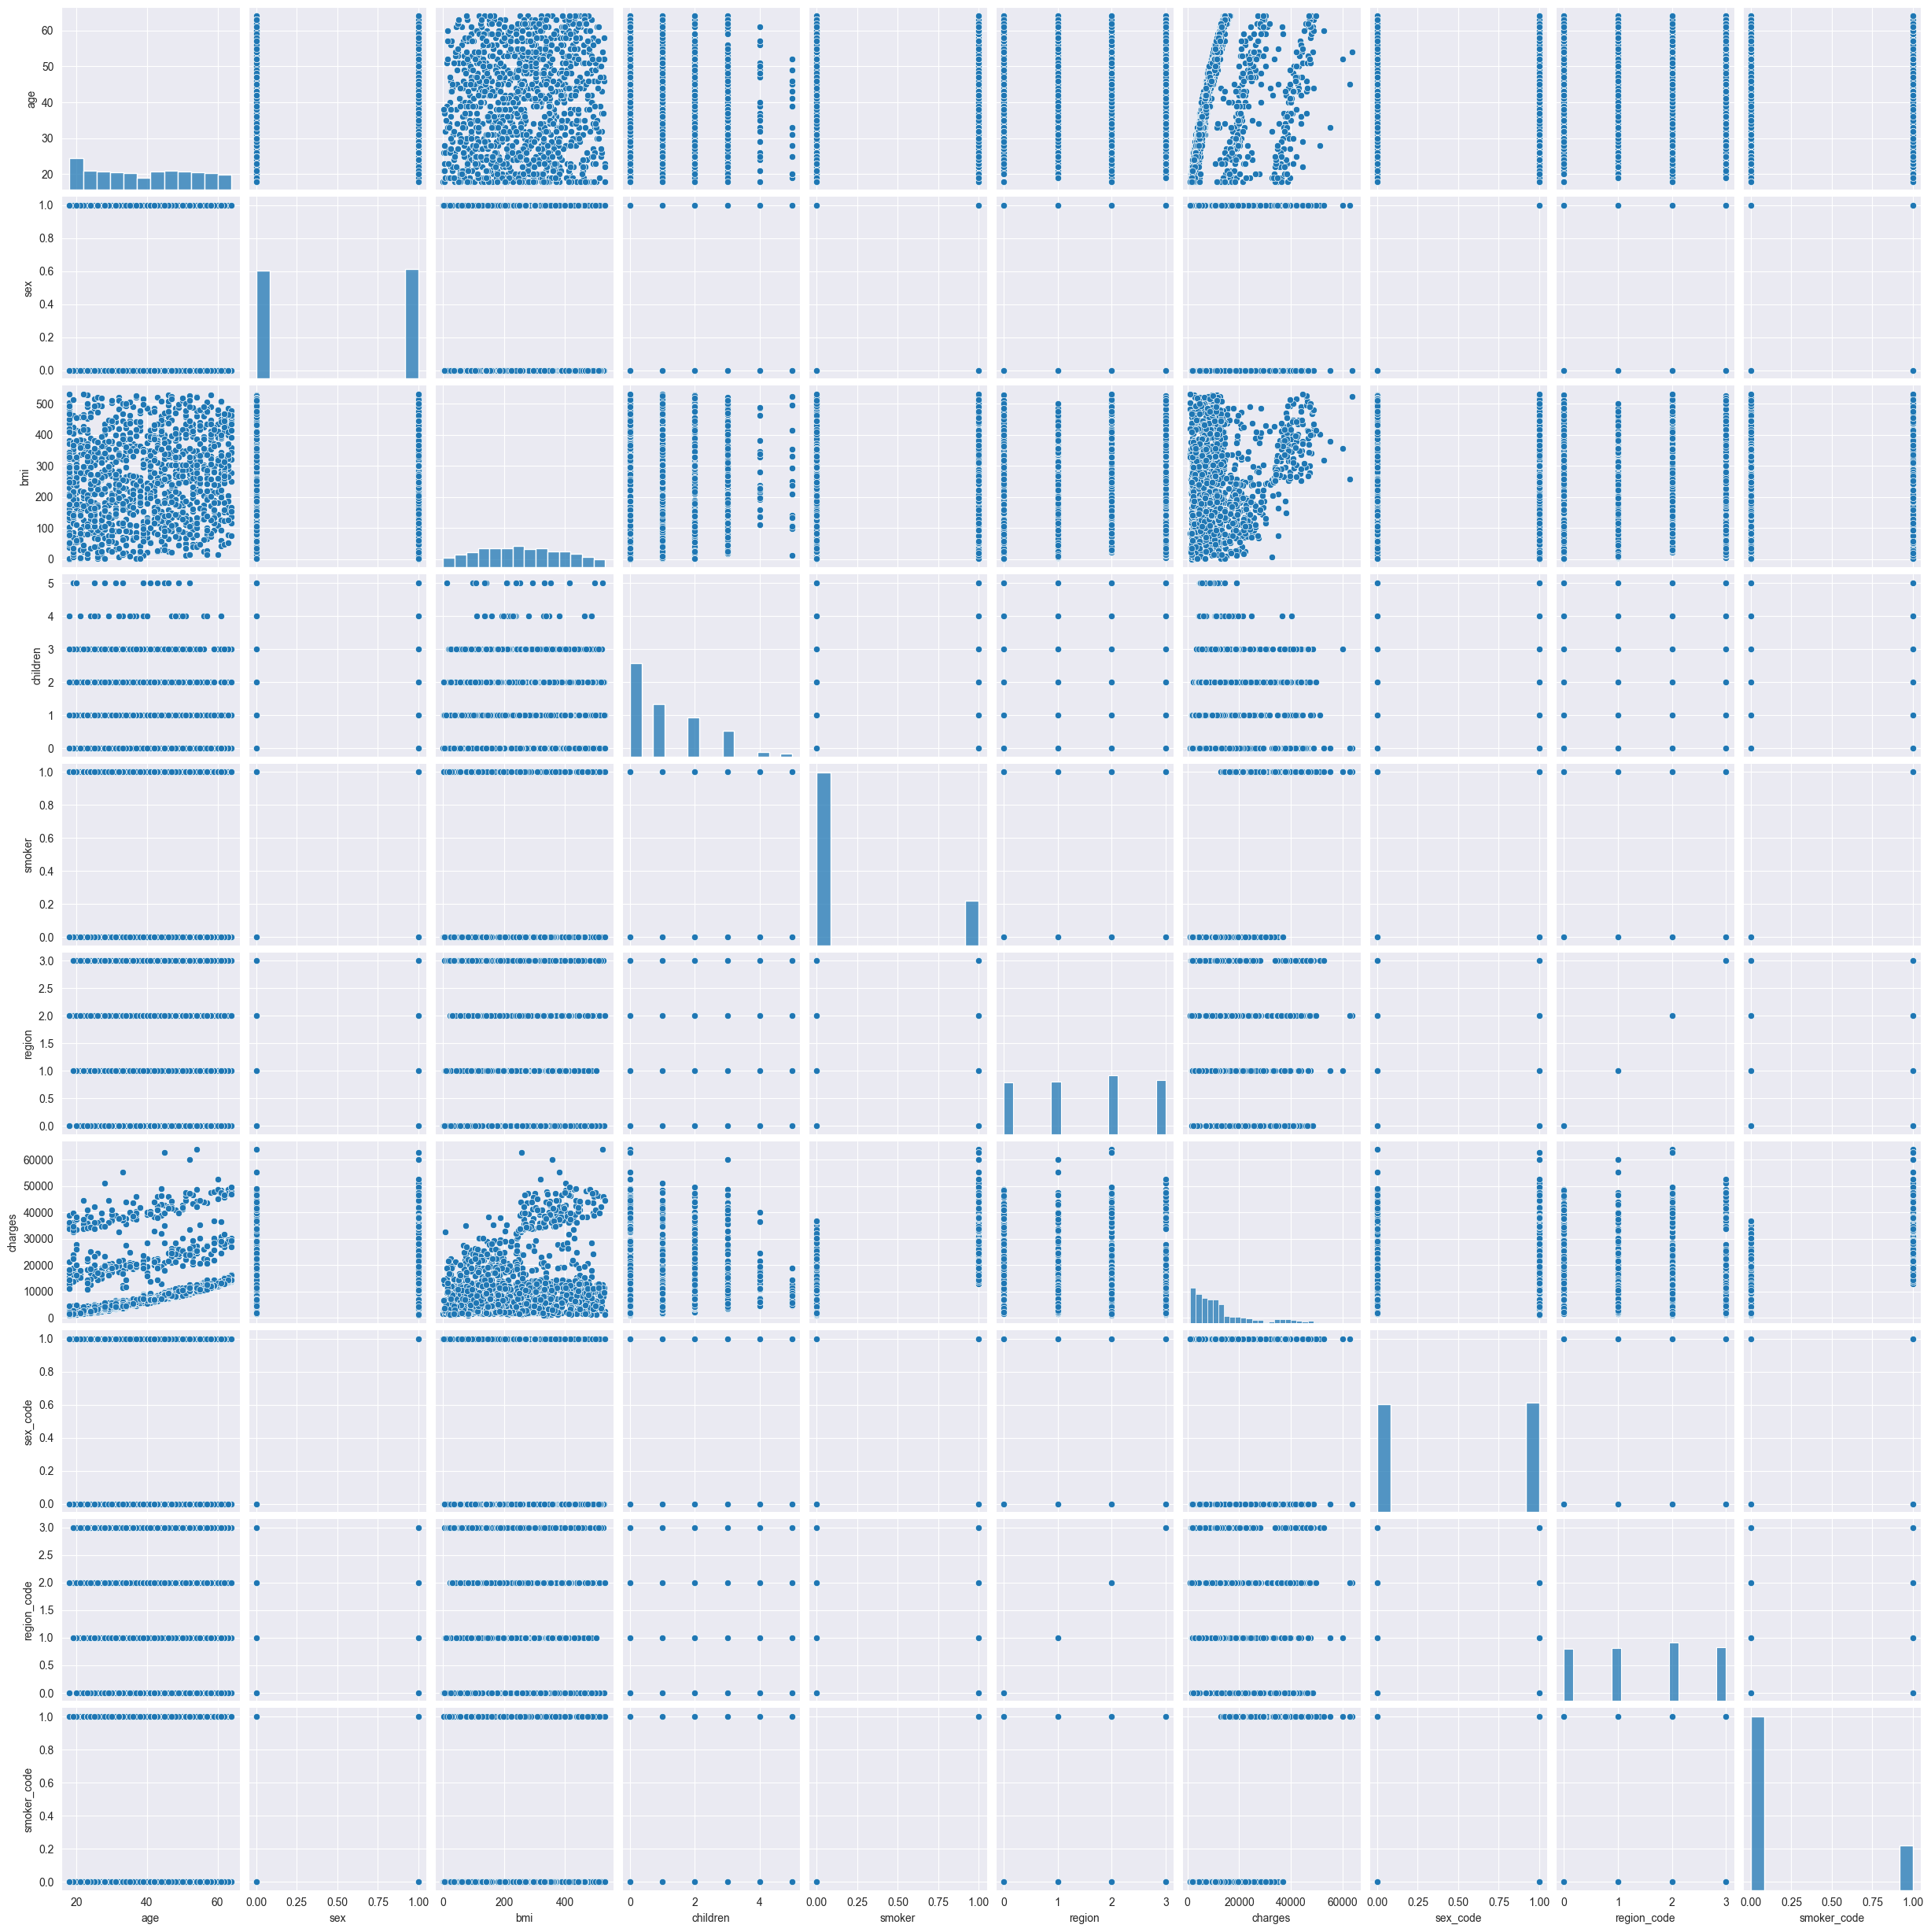

In [32]:
from sklearn.preprocessing import LabelEncoder
import copy
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region','bmi']] = df.loc[:,['sex', 'smoker', 'region','bmi']].apply(LabelEncoder().fit_transform)
sns.pairplot(df_encoded)
plt.show()

In [ ]:
# Insight: Из графика видим, что значение bmi больше влияет на charges. Чем больше значение bmi, тем выше charges.

In [ ]:
# Вывод: В данной работе был создан модели линейной регресси для предсказания индивидуальных медицинских расходов, на основе предоставленных данных. Smoker, возраст и ИМТ положительно влияют на charges.